# **Stock Price Prediction**
Optional assignment (2 Marks over and above the scored marks out of 100)

Given last 50 days of tesla price and S&P500, plot next five days of predicted tesla stock price, compare with actual. Show your results using comparative graphs as done for the flights data above.

In [ ]:
import pandas_datareader.data as web
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
Tesla = web.DataReader('TSLA',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31') #Extract data from yahoo finance website
SP500 = web.DataReader('^GSPC',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31')

#Check both lengths are same. If you pull data from different stock exchanges, the length might be different depending on holidays
print(len(Tesla['Open']))
print(len(SP500['Open'])) 
#Getany other  ticker by searching here https://finance.yahoo.com/quote/

1006
1006


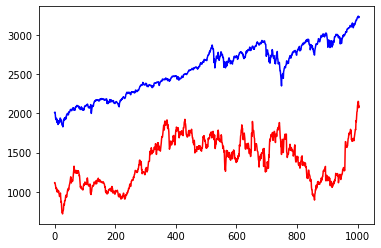

In [ ]:
L = len(Tesla['Open'])
All_Data = np.concatenate((np.array(Tesla['Open']).reshape(L,1), np.array(Tesla['Close']).reshape(L,1), 
                           np.array(Tesla['High']).reshape(L,1), np.array(Tesla['Low']).reshape(L,1), 
                           np.array(SP500['Open']).reshape(L,1), np.array(SP500['Close']).reshape(L,1),
                          np.array(SP500['High']).reshape(L,1), np.array(SP500['Low']).reshape(L,1)), axis = 1)
plt.plot(np.array(Tesla['Close'])*5, 'r')  #Displayed at 5 times the scale for better visualization
plt.plot(np.array(SP500['Close']), 'b')


In [ ]:
All_Data.shape

(1006, 8)

In [ ]:
#There are 12 columns in the fetched data. Many of the columns are not of our interest so only significant columns are selected to create the main dataset.
Tesla['Date'] = Tesla.index
data1 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data1['Date'] = Tesla['Date']
data1['Open'] = Tesla['Open']
data1['High'] = Tesla['High']
data1['Low'] = Tesla['Low']
data1['Close'] = Tesla['Close']


SP500['Date'] = SP500.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = SP500['Date']
data2['Open'] = SP500['Open']
data2['High'] = SP500['High']
data2['Low'] = SP500['Low']
data2['Close'] =SP500['Close']

In [ ]:
# Preprocess the data in order to prepare it for the LSTM model. 
#The data fetched in step one is used for training purpose only. 
#For testing purpose, different data will be fetched later.
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1006):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [ ]:
# Define the LSTM Recurrent Neural Network.
# Here, you can add more LSTM layers and adjust the dropout in order to improve the accuracy of the model.
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))




In [ ]:
# Compile and train the model defined in the above step.
#Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 150, batch_size = 5)

Epoch 1/150
946/946 [==============================] - 20s 21ms/step - loss: 0.0171
Epoch 2/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0073
Epoch 3/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0057
Epoch 4/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0047
Epoch 5/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0043
Epoch 6/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0037
Epoch 7/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0040
Epoch 8/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0037
Epoch 9/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0030
Epoch 10/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0031
Epoch 11/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0029
Epoch 12/150
946/946 [==============================] - 18s 19ms/step - lo

In [ ]:
SP_Test = web.DataReader('^GSPC',data_source = 'yahoo', start = '2020-01-01', end = '2020-4-30')

SP_Test['Date'] = SP_Test.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = SP_Test ['Date']
testdata['Open'] =SP_Test['Open']
testdata['High'] = SP_Test['High']
testdata['Low'] = SP_Test['Low']
testdata['Close'] = SP_Test['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test1 = []
for i in range(60,129 ):
    X_test1.append(inputs[i-60:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))

In [ ]:
#Testing model
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

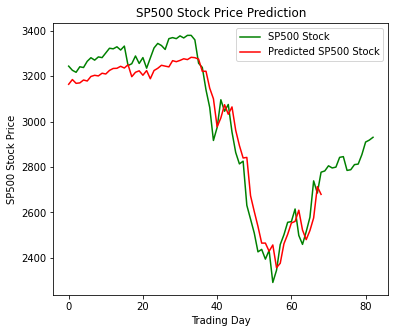

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(real_stock_price, color = 'green', label = 'SP500 Stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SP500 Stock')
plt.title('SP500 Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SP500 Stock Price')
plt.legend()
plt.show()

In [ ]:

train_set1 = data1.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set1)
X_train1 = []
y_train1 = []
for i in range(60, 1006):
    X_train1.append(training_set_scaled[i-60:i, 0])
    y_train1.append(training_set_scaled[i, 0]) 
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))

In [ ]:
# Define the LSTM Recurrent Neural Network.
# Here, you can add more LSTM layers and adjust the dropout in order to improve the accuracy of the model.
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


In [ ]:
# Compile and train the model defined in the above step.
#Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 150, batch_size = 5)

Epoch 1/150
946/946 [==============================] - 20s 21ms/step - loss: 0.0208
Epoch 2/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0098
Epoch 3/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0085
Epoch 4/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0073
Epoch 5/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0068
Epoch 6/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0062
Epoch 7/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0061
Epoch 8/150
946/946 [==============================] - 18s 19ms/step - loss: 0.0049
Epoch 9/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0043
Epoch 10/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0040
Epoch 11/150
946/946 [==============================] - 19s 20ms/step - loss: 0.0038
Epoch 12/150
946/946 [==============================] - 19s 20ms/step - lo

In [ ]:
#Now, our model is trained and needs to be tested on the testing data.
#For this purpose, fetch the new data for a different period. 
#Preprocessing steps are similar as we have done with training data.
Tesla_Test = web.DataReader('TSLA',data_source = 'yahoo', start = '2020-01-01', end = '2020-4-30') #Extract data from yahoo finance website


Tesla_Test['Date'] = Tesla_Test.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = Tesla_Test ['Date']
testdata['Open'] =Tesla_Test['Open']
testdata['High'] = Tesla_Test['High']
testdata['Low'] = Tesla_Test['Low']
testdata['Close'] = Tesla_Test['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,129 ):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Testing model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

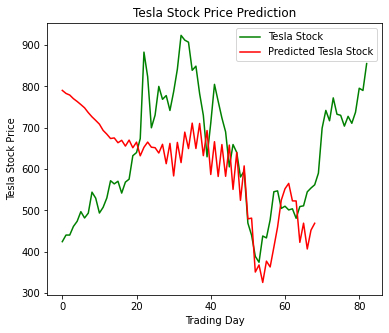

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(real_stock_price, color = 'green', label = 'Tesla Stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Tesla Stock')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()